In [2]:
from usopp.utils import get_periodic_peaks

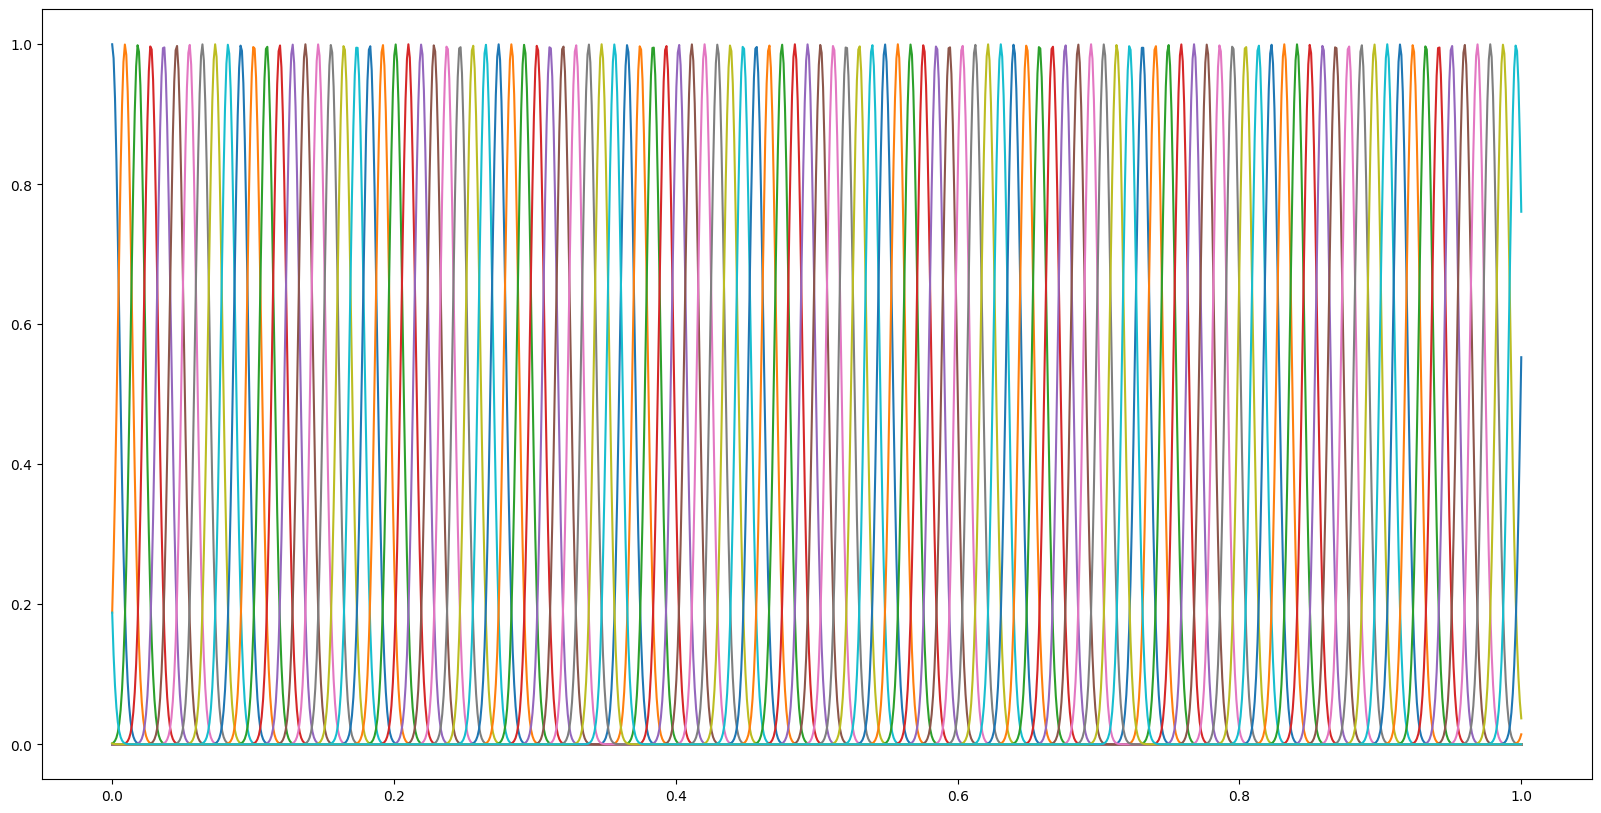

In [54]:
t = model._X_scaler_.fit_transform(df.t)
res = model._X_t(t.values, model.peaks_, 0.005, model.p_)
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i in range(40):
    plt.plot(t, res[:, i])

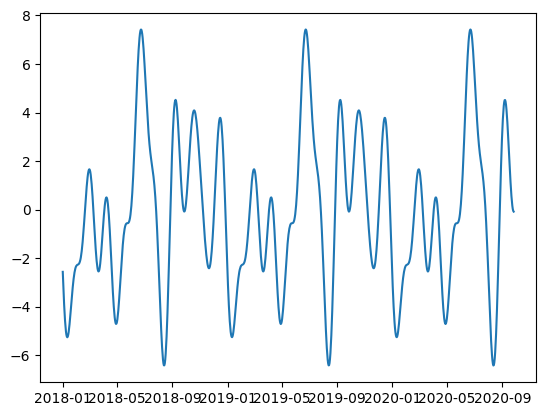

In [49]:
import matplotlib.pyplot as plt
plt.plot(df["t"], df["value"], label="true")

/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

<Figure size 1800x100 with 0 Axes>

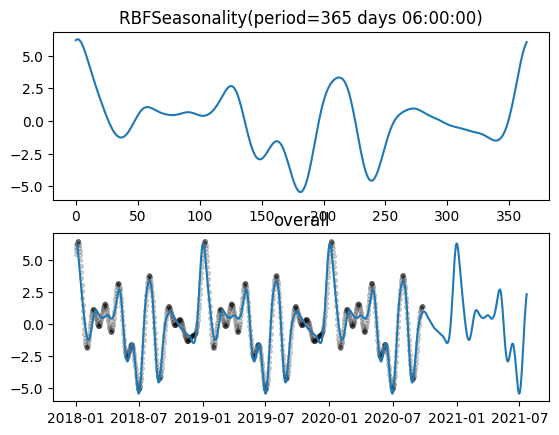

In [2]:
from usopp import RBFSeasonality
from usopp.utils import seasonal_data, MinMaxScaler
import pandas as pd
import numpy as np

df, _ = seasonal_data(10)
from usopp.utils import get_periodic_peaks
peaks = get_periodic_peaks(20)
model = RBFSeasonality(period=pd.Timedelta(days=365.25),peaks=peaks, sigma=0.01)
model.fit(df[['t']], df['value'], y_scaler=MinMaxScaler, use_mcmc=False)
model.plot_components(X_true=df, y_true=df['value']);

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [RBFSeasonality(period=365 days 06:00:00)-beta, sigma]


/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


<Figure size 1800x100 with 0 Axes>

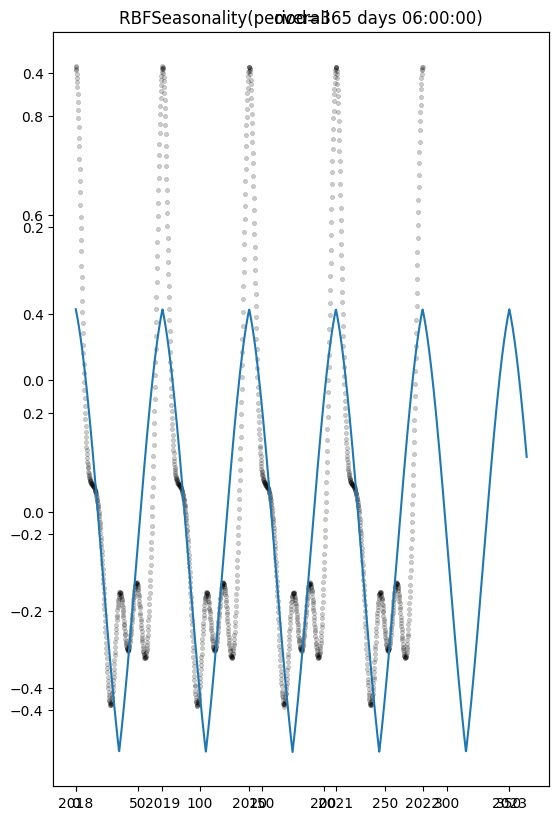

In [8]:
from usopp.rbf_seasonality import RBFSeasonality
from usopp.utils import rbf_seasonal_data
from usopp.utils import MinMaxScaler

df, beta = rbf_seasonal_data(5)
#df["value"] = df["value"] * 100 + 100
model = RBFSeasonality()
model.fit(df[["t"]], df["value"], use_mcmc=True, y_scaler=MinMaxScaler)
res = model.plot_components(X_true=df[["t"]], y_true=df["value"])


/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

<Figure size 1800x100 with 0 Axes>

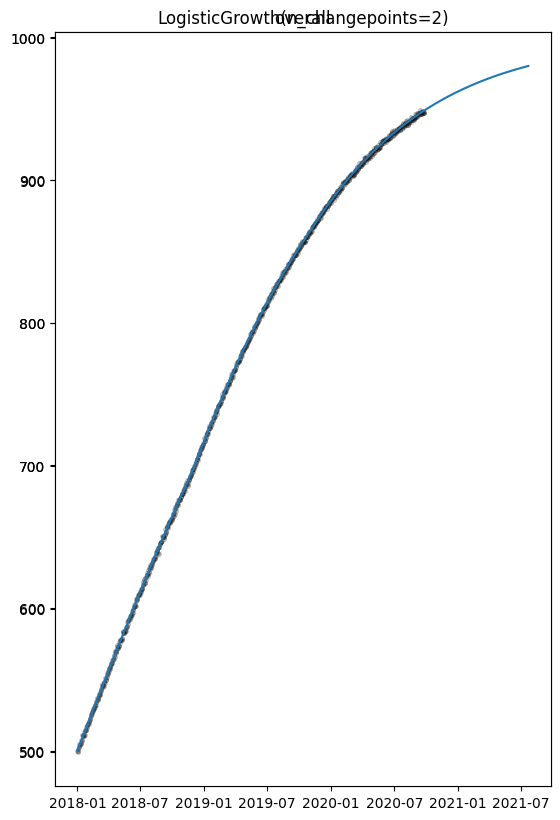

In [2]:

from usopp.logistic_growth import LogisticGrowth
from usopp.utils import logistic_growth_data
from usopp.utils import MaxScaler

df, delta = logistic_growth_data(2)
df["value"] = df["value"] * 1000
model = LogisticGrowth(capacity=1000, n_changepoints=2)
model.fit(df[["t"]], df["value"], use_mcmc=False, y_scaler=MaxScaler)
res = model.plot_components(X_true=df[["t"]], y_true=df["value"])


In [30]:
delta

array([ 0.26123104, -0.18280221])

In [31]:
model.trace_[model._param_name("delta")]

array([[ 0.25834946, -0.1843197 ]])

In [6]:
df

,t,value
0,2018-01-01,50.008006
1,2018-01-02,50.153182
2,2018-01-03,49.995318
3,2018-01-04,50.098011
4,2018-01-05,50.267504
...,...,...
995,2020-09-22,94.177420
996,2020-09-23,94.062013
997,2020-09-24,94.179185
998,2020-09-25,94.351860


In [7]:
delta

array([0.03508644, 0.09505214])

In [8]:
model.trace_[model._param_name("delta")]

array([[1.96963714e-08, 1.08105170e-07]])

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [LinearTrend(n_changepoints=5)-delta, LinearTrend(n_changepoints=5)-k, LinearTrend(n_changepoints=5)-m, sigma]


/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 49 seconds.


<Figure size 1800x100 with 0 Axes>

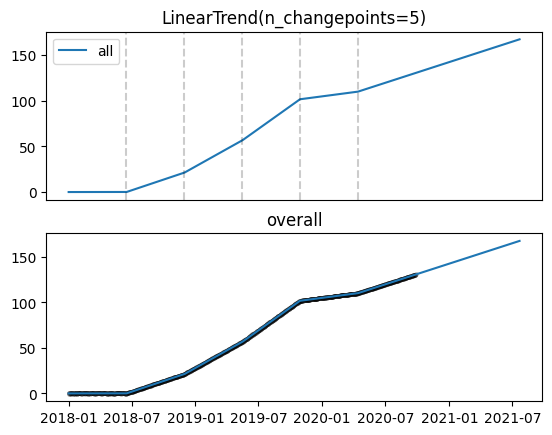

In [1]:

from usopp.linear_trend import LinearTrend
from usopp.utils import seasonal_data, trend_data

trend, _ = trend_data(5)
trend["value"] = trend["value"] * 100
model = LinearTrend(n_changepoints=5)
model.fit(trend[["t"]], trend["value"], use_mcmc=True)
res = model.plot_components(X_true=trend[["t"]], y_true=trend["value"])


In [5]:
res

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
               '2021-07-21', '2021-07-22'],
              dtype='datetime64[ns]', length=1299, freq='D')

NotImplementedError: <ufunc 'matmul'> not supported: xarray objects do not directly implement generalized ufuncs. Instead, use xarray.apply_ufunc or explicitly convert to xarray objects to NumPy arrays (e.g., with `.values`).

<Figure size 1800x100 with 0 Axes>

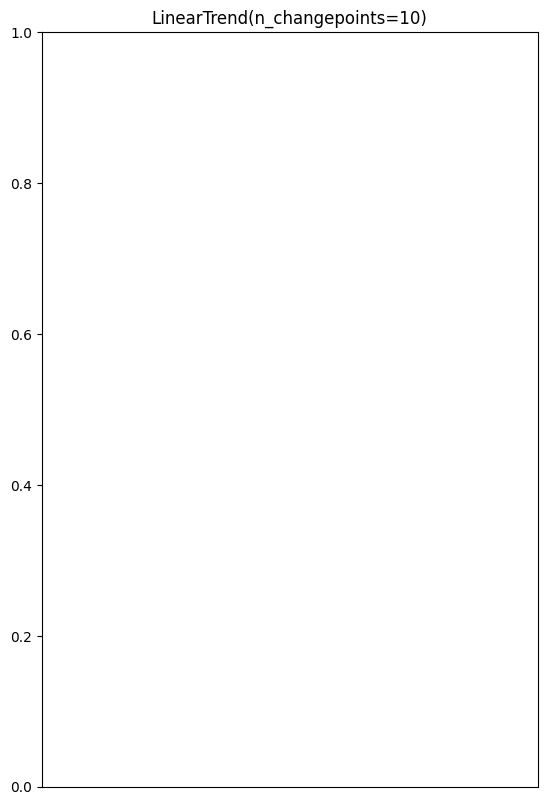

In [2]:
res = model.plot_components(X_true=trend[["t"]], y_true=trend["value"])


/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

<Figure size 1800x100 with 0 Axes>

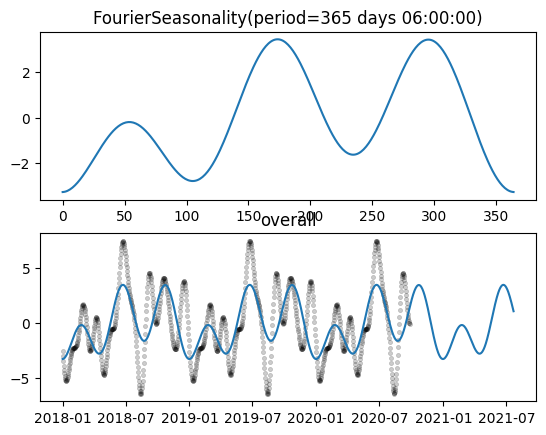

In [52]:
from usopp.fourier_seasonality import FourierSeasonality
from usopp.linear_trend import LinearTrend
from usopp.utils import seasonal_data, trend_data

#df, beta = seasonal_data(6)
#trend, _ = trend_data(5)
#trend["value"] = trend["value"] * 100
#df["value"] = df["value"] * 10 + trend["value"]

model = FourierSeasonality(n=3)
from usopp.utils import IdentityScaler

model.fit(df[["t"]], df["value"], use_mcmc=False)
import matplotlib.pyplot as plt
res = model.plot_components(X_true=df[["t"]], y_true=df["value"])
#plt.plot(res)
#plt.plot(df.value)

In [3]:
model.trace.keys()

dict_keys(['FourierSeasonality(period=365 days 06:00:00)-beta', 'sigma_log__', 'sigma'])

In [14]:
res

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
               '2021-07-21', '2021-07-22'],
              dtype='datetime64[ns]', length=1299, freq='D')

In [7]:
beta

array([-1.30191757,  0.52531906, -1.21539191,  0.33953317, -0.96680149,
       -0.13213175, -1.68520207, -1.16424545, -0.06063012,  1.11377648])

In [8]:
model.trace_["posterior"][model._param_name("beta")].values[:,:,0,:][0].mean(axis=0)

array([-0.58638057,  0.22295986, -0.55627626,  0.14984375, -0.41218009,
       -0.05064389, -0.75727337, -0.50564605, -0.03207793,  0.51875692])